In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [3]:
(XTrain, YTrain), (XTest, YTest) = fashion_mnist.load_data()

In [4]:
print("X train shape:", XTrain.shape, "Y train shape:", YTrain.shape)
print("X test shape:", XTest.shape, "Y test shape:", YTest.shape)

X train shape: (60000, 28, 28) Y train shape: (60000,)
X test shape: (10000, 28, 28) Y test shape: (10000,)


In [5]:
import matplotlib.pyplot as plt
plt.imshow(XTrain[5])

In [6]:
print(YTrain[5])

2


In [7]:
LabelData = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'AnkleBoot',
}

Text(0.5, 1.0, '(Object: Pullover)')

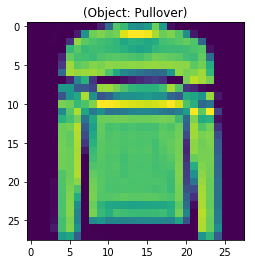

In [8]:
plt.imshow(XTrain[5])
plt.title("(Object: " + str(LabelData[YTrain[5]]) + ")")

In [9]:
import numpy as np
unique, counts = np.unique(YTrain, return_counts=True)

In [10]:
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [11]:
unique, counts = np.unique(YTest, return_counts=True)
print (dict(zip(unique, counts)))

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [12]:
XTrain = XTrain / 255.0
XTest = XTest / 255.0

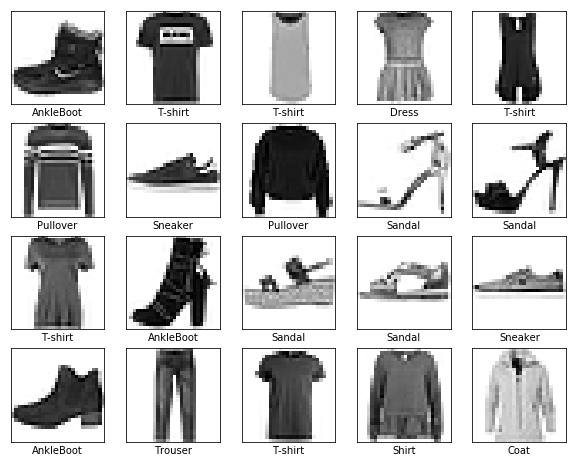

In [14]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(XTrain[i], cmap=plt.cm.binary)
    plt.xlabel(LabelData[YTrain[i]])

In [24]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers import Dense, MaxPool2D, Conv2D, Activation
from keras.initializers import Constant

In [20]:
XTrain = XTrain.reshape(XTrain.shape[0], 1, 28, 28)
XTest = XTest.reshape(XTest.shape[0], 1, 28, 28)

In [21]:
YTrain = np_utils.to_categorical(YTrain, 10)
YTest = np_utils.to_categorical(YTest, 10)

In [22]:
CNNModel = Sequential()
CNNModel.add(Conv2D(32, kernel_size=(2, 2),
    padding='same',
    bias_initializer=Constant(0.02),
    kernel_initializer='random_uniform',
    input_shape=(1, 28, 28)
    )
)

In [25]:
CNNModel.add(Activation('relu'))
CNNModel.add(MaxPool2D(padding='same'))

In [26]:
CNNModel.add(Conv2D(64,kernel_size=(2, 2),
    padding='same',
    bias_initializer=Constant(0.02),
    kernel_initializer='random_uniform'
    )
)

In [27]:
CNNModel.add(Activation('relu'))

In [28]:
CNNModel.add(MaxPool2D(padding='same'))

In [29]:
CNNModel.add(Flatten())

In [30]:
CNNModel.add(Dense(128,
    activation='relu',
    bias_initializer=Constant(0.02),
    kernel_initializer='random_uniform',
    )
)

In [31]:
CNNModel.add(Dense(10, activation='softmax'))

In [33]:
CNNModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 28, 32)         3616      
_________________________________________________________________
activation_1 (Activation)    (None, 1, 28, 32)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 14, 64)         8256      
_________________________________________________________________
activation_2 (Activation)    (None, 1, 14, 64)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 448)               0         
__________

In [34]:
CNNModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
CNNModel.fit(XTrain, YTrain, epochs=1000,batch_size=32, verbose=1)

ValueError: Error when checking target: expected dense_2 to have 2 dimensions, but got array with shape (60000, 10, 10)

In [36]:
Scores = CNNModel.evaluate(XTest,YTest, verbose=1)

ValueError: Error when checking target: expected dense_2 to have 2 dimensions, but got array with shape (10000, 10, 10)

In [19]:
print('Test loss:', Scores[0])
print('Test accuracy:', Scores[1])